In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
df=pd.read_csv("Pima_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

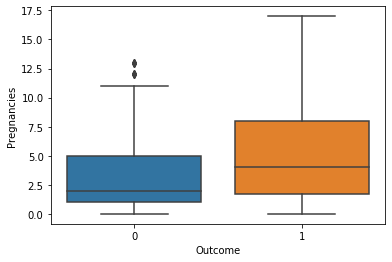

In [6]:
sns.boxplot(y=df["Pregnancies"],x=df["Outcome"])

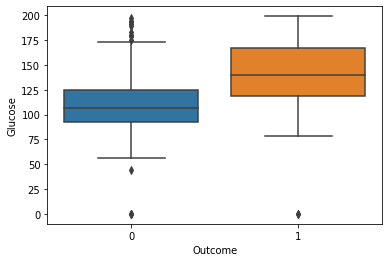

In [8]:
sns.boxplot(y=df["Glucose"],x=df["Outcome"])

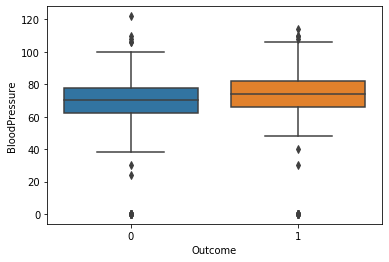

In [9]:
sns.boxplot(y=df["BloodPressure"],x=df["Outcome"])

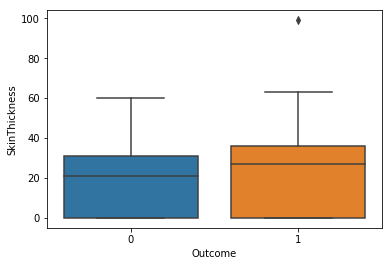

In [0]:
sns.boxplot(y=df["SkinThickness"],x=df["Outcome"])

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [0]:
df.drop("SkinThickness",axis=1,inplace=True)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
x=df[["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y=df["Outcome"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=15)
xtrain,xval,ytrain,yval= train_test_split(xtrain,ytrain,test_size=0.2,random_state=15)

In [16]:
accuracy=[]
for k in range(1,20):
    knc=KNeighborsClassifier(k,'distance')
    knc.fit(xtrain,ytrain)
    accuracy.append(knc.score(xval,yval))
maxx=max(accuracy)
k_max=accuracy.index(maxx)+1
print("The best value of k is : ",k_max,"\n and the best value is:",maxx)

The best value of k is :  12 
 and the best value is: 0.8048780487804879


In [0]:
import matplotlib.pyplot as plt

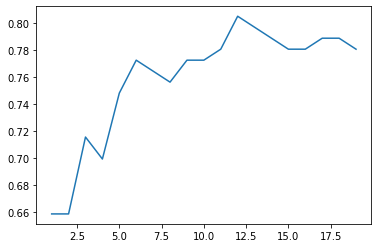

In [18]:
plt.plot(range(1,20),accuracy)

In [0]:
# Now we will use the value of k with highest efficency

In [19]:
knc=KNeighborsClassifier(k_max,'distance')
knc.fit(xtrain,ytrain)
print("The score on test set is:",knc.score(xtest,ytest))

The score on test set is: 0.7662337662337663
